In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('./archive/02-14-2018.csv')

In [2]:
from unidecode import unidecode
data.drop(['Timestamp'],axis=1,inplace=True)
data["Label"] = data["Label"].apply(unidecode)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 79 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  int64  
 1   Protocol           1048575 non-null  int64  
 2   Flow Duration      1048575 non-null  int64  
 3   Tot Fwd Pkts       1048575 non-null  int64  
 4   Tot Bwd Pkts       1048575 non-null  int64  
 5   TotLen Fwd Pkts    1048575 non-null  int64  
 6   TotLen Bwd Pkts    1048575 non-null  int64  
 7   Fwd Pkt Len Max    1048575 non-null  int64  
 8   Fwd Pkt Len Min    1048575 non-null  int64  
 9   Fwd Pkt Len Mean   1048575 non-null  float64
 10  Fwd Pkt Len Std    1048575 non-null  float64
 11  Bwd Pkt Len Max    1048575 non-null  int64  
 12  Bwd Pkt Len Min    1048575 non-null  int64  
 13  Bwd Pkt Len Mean   1048575 non-null  float64
 14  Bwd Pkt Len Std    1048575 non-null  float64
 15  Flow Byts/s        1046298 non-n

In [4]:
data.head()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,112641719,3,0,0,0,0,0,0.000000,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,112641466,3,0,0,0,0,0,0.000000,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,112638623,3,0,0,0,0,0,0.000000,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,6453966,15,10,1239,2273,744,0,82.600000,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
4,22,6,8804066,14,11,1143,2209,744,0,81.642857,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign


In [5]:
data["Label"].value_counts()

Benign            667626
FTP-BruteForce    193360
SSH-Bruteforce    187589
Name: Label, dtype: int64

<AxesSubplot:>

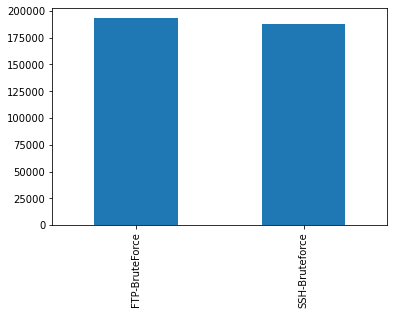

In [6]:
data[data["Label"] != "Benign"]["Label"].value_counts().plot(kind='bar')

In [7]:
np.unique(data['Label'])

array(['Benign', 'FTP-BruteForce', 'SSH-Bruteforce'], dtype=object)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder



#drop na values and reset index
data_clean = data.dropna().reset_index()
data_clean

,index,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,0,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,1,0,0,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,2,0,0,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,3,22,6,6453966,15,10,1239,2273,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
4,4,22,6,8804066,14,11,1143,2209,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046293,1048570,80,6,10156986,5,5,1089,1923,587,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
1046294,1048571,80,6,117,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
1046295,1048572,80,6,5095331,3,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
1046296,1048573,80,6,5235511,3,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign


In [9]:
# label encoding
labelencoder = LabelEncoder()
data_clean['Label'] = labelencoder.fit_transform(data_clean['Label'])

data_np = data_clean.to_numpy(dtype="float32")

data_np

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 5.6320960e+07,
        5.6320760e+07, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 5.6320816e+07,
        5.6320652e+07, 0.0000000e+00],
       [2.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 5.6319524e+07,
        5.6319096e+07, 0.0000000e+00],
       ...,
       [1.0485720e+06, 8.0000000e+01, 6.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0485730e+06, 8.0000000e+01, 6.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0485740e+06, 4.4300000e+02, 6.0000000e+00, ..., 5.5156500e+06,
        5.5156500e+06, 0.0000000e+00]], dtype=float32)

In [10]:
data_np = data_np[~np.isinf(data_np).any(axis=1)]

X = data_np[:, 0:78]

print(X)

enc = OneHotEncoder()

Y = enc.fit_transform(data_np[:,79:]).toarray()

print("****")
print(Y)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 5.6320860e+07
  1.3930003e+02 5.6320960e+07]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 5.6320732e+07
  1.1455130e+02 5.6320816e+07]
 [2.0000000e+00 0.0000000e+00 0.0000000e+00 ... 5.6319312e+07
  3.0193460e+02 5.6319524e+07]
 ...
 [1.0485720e+06 8.0000000e+01 6.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [1.0485730e+06 8.0000000e+01 6.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [1.0485740e+06 4.4300000e+02 6.0000000e+00 ... 5.5156500e+06
  0.0000000e+00 5.5156500e+06]]
****
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [11]:
# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.25, random_state=2, shuffle=True)

_features = X.shape[1]
n_classes = Y.shape[1]

print(_features)

78


In [12]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
import uuid
import gc
from tensorflow import keras
import tensorflow as tf
from keras.models import Sequential
from keras import callbacks
from keras.layers import Dense, Activation, Flatten, Convolution1D, Dropout
from sklearn import metrics
from hyperopt import fmin, hp, tpe, Trials, STATUS_OK
from hyperopt.plotting import main_plot_history, main_plot_vars

In [14]:
model = Sequential()
model.add(Convolution1D(filters=128, kernel_size=6, input_shape=(78, 1)))
model.add(Activation('relu'))
model.add(Convolution1D(filters=256, kernel_size=6))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(15))
model.add(Activation('softmax'))
model.summary() 

tf.keras.utils.plot_model(
    model,
        show_shapes=True,
    show_dtype=False,
      show_layer_names=False,
)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 73, 128)           896       
_________________________________________________________________
activation_3 (Activation)    (None, 73, 128)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 68, 256)           196864    
_________________________________________________________________
activation_4 (Activation)    (None, 68, 256)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 17408)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               4456704   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)              

In [16]:
K = keras.backend

nn_history = {}

def train_dynamic_model(args):
    print('\nRun') 
    print('==========')
    print('Parameters:\n{}'.format(args))
    
    batch_size = int(args['batch_size'])
    dropout_rate = args['dropout_rate']
    model_name = '3NN-models/{}.h5'.format(uuid.uuid4()) 
    opt_name = args['optimizer']['name']

        
    K.clear_session()
    gc.collect()

 

    # Simple 3 Layer Dense Model
    model = Sequential()
    model.add(Dense(128, input_dim=_features, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(n_classes))
    model.add(Activation('softmax'))
    model.summary() 

    model.compile(loss='categorical_crossentropy',optimizer=opt_name ,metrics=['accuracy'])

    early_stop_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                  patience=3, min_lr=0.001)
    
    hist = model.fit(X_train, Y_train,
                              batch_size=batch_size,
                              epochs=30,
                              verbose=True,
                              validation_data=(X_test, Y_test),
                              callbacks=[reduce_lr, early_stop_callback])
    
    nn_history[model_name] = hist.history
    
    y_pred = model.predict_classes(X_test)
    balanced_score = metrics.balanced_accuracy_score(np.argmax(Y_test, axis=1), y_pred) * 100
    
    best_loss = np.amin(hist.history['val_loss']) 
    print('Best loss: {}'.format(best_loss))
    print('Model: {}'.format(model_name))
    print('Balanced Acc loss: {}'.format(balanced_score))
    
    return {
        'loss': best_loss,
        'status': STATUS_OK,
        'model_name': model_name
    }

In [17]:
args = {
    'batch_size': 500,
    'dropout_rate': 0.1,
    'optimizer':
        {
            'name': 'adam',
        }
}
train_dynamic_model(args)


Run
Parameters:
{'batch_size': 500, 'dropout_rate': 0.1, 'optimizer': {'name': 'adam'}}
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               10112     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 387       
_________________________________________________________________
activation (Activation)      (None, 3)                 0         
Total params: 43,523
Trainable pa

D:\Users\hyo\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Best loss: 0.000220425397856161
Model: 3NN-models/65e44866-7e99-4878-b2cc-62c4c7bbb282.h5
Balanced Acc loss: 99.99340577706076


{'loss': 0.000220425397856161,
 'status': 'ok',
 'model_name': '3NN-models/65e44866-7e99-4878-b2cc-62c4c7bbb282.h5'}

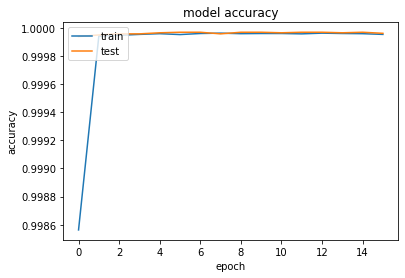

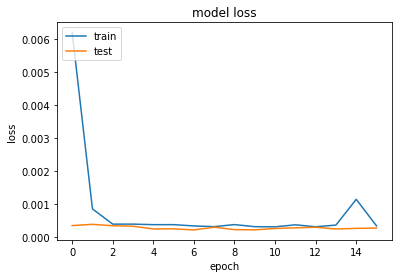

In [18]:
import matplotlib.pyplot as plt

plt.plot(nn_history["3NN-models/65e44866-7e99-4878-b2cc-62c4c7bbb282.h5"]['accuracy'])
plt.plot(nn_history["3NN-models/65e44866-7e99-4878-b2cc-62c4c7bbb282.h5"]['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(nn_history["3NN-models/65e44866-7e99-4878-b2cc-62c4c7bbb282.h5"]['loss'])
plt.plot(nn_history["3NN-models/65e44866-7e99-4878-b2cc-62c4c7bbb282.h5"]['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()